<div style="text-align:center;">
  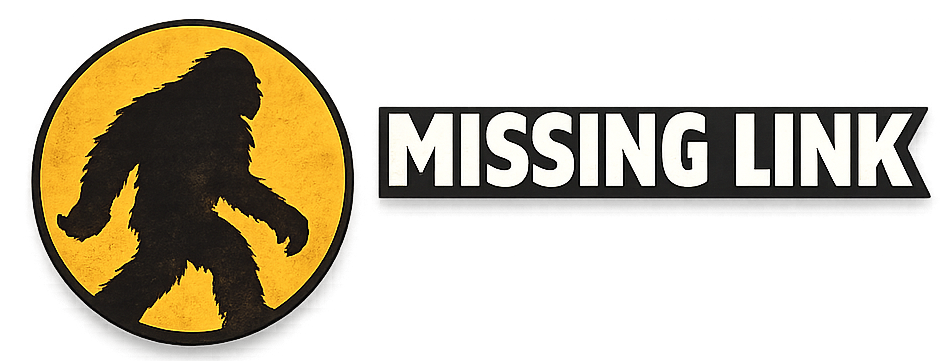
  <div style="margin-top:12px; font-size:16px;">
    <b>MissingLink Pre-Built Optimized A100 Colab Python wheels</b><br/>
    TRELLIS.2 Notebook, configuration time savings + batch 3D model generation on an A100.
  </div>
</div>

The *TRELLIS.2 MissingLink Notebook* lets you **Generate 3D Models from Images** using the latest state of the art model from Microsoft.

It is designed to get you up and running in colab with zero configuration and zero headaches so you don't waste time and money on your A100 compiling and optimizing dependencies.

1. [Get a Token](https://missinglink.build/create-checkout-session) by signing up for the free trial at https://missinglink.build this will let you download the optimized A100 Colab wheels.

2. Upload all your image files to the folder "images_in" *( Each image must have transparency channel i.e. RGBA .png is preferred )*

3. Click Run All

The process will save the completed models along with an .mp4 file to trellis_models_out folder in your google drive. If the process is stopped or notebook disconnected you can restart and the process will continue from where you left.

Once signed up you can use the MissingLink wheels on any project, these wheels are highly optimized compiled specifically for the colab runtime environment.

*Don't waste your time worrying about configuration or waiting for compilation!*

In [ ]:
#1. Get a token and install MissingLink dependencies
TOKEN="*************"
!pip install --no-deps -r "https://{TOKEN}@missinglink.build/a100.txt"
!pip install -q trimesh pygltflib plyfile moderngl huggingface_hub kornia kornia-rs
!git clone --recursive https://github.com/PotentiallyARobot/TRELLIS.2.git
!pip -q install -U huggingface_hub

from huggingface_hub import login
HF_TOKEN="*****"
login(token=HF_TOKEN)  # will prompt for your token (input is hidden)

#3. Upload your image files with transparency! (This will save time on A100!)
import os
os.environ["HF_TOKEN"]=HF_TOKEN
os.makedirs("/content/images_in", exist_ok=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 119.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.3/740.3 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Remove Background if needed
import os
from pathlib import Path
import torch
from transformers import pipeline

# (Optional but recommended) Patch for RMBG on newer transformers
if not hasattr(torch.nn.Module, "_patched_all_tied_weights_keys"):
    torch.nn.Module._patched_all_tied_weights_keys = True

    @property
    def _all_tied_weights_keys_default(self):
        return {}
    setattr(torch.nn.Module, "all_tied_weights_keys", _all_tied_weights_keys_default)
#november 4
# m c appliance service 301 386 4184
in_dir = Path("/content/images_in")
out_dir = Path("/content/images_in_bg_removed")  # save in same folder; change if you want
out_dir.mkdir(parents=True, exist_ok=True)

pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)

exts = {".jpg", ".jpeg", ".png", ".webp", ".bmp", ".tif", ".tiff"}

for p in sorted(in_dir.iterdir()):
    if not p.is_file() or p.suffix.lower() not in exts:
        continue

    base = p.stem
    out_path = out_dir / f"{base}_transparent.png"

    # Skip if already done (optional)
    # if out_path.exists():
    #     continue

    # RMBG returns a PIL image with transparency already applied
    rgba = pipe(str(p))
    rgba.save(out_path, "PNG")

    print(f"✅ {p.name} -> {out_path.name}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


MyPipe.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyPipe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/798 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

The image processor of type `ImageImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 
`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.


✅ tank_blur_test3.png -> tank_blur_test3_transparent.png
✅ tank_blur_test_2.png -> tank_blur_test_2_transparent.png
✅ tank_reg_crop.png -> tank_reg_crop_transparent.png


In [ ]:
# Generate 3D Models from Images
# Runs a batch process on a folder of images with TRELLIS.2, save MP4 + GLB to Drive

import os, sys, pathlib, subprocess, re, time
os.environ["TRELLIS2_DISABLE_REMBG"] = "1"

def sh(cmd):
    print("\n$", cmd)
    subprocess.check_call(["bash", "-lc", cmd])

# -------------------------
# 0) Mount Drive
# -------------------------
if not os.path.exists("/content/drive/MyDrive"):
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)

# -------------------------
# 1) Paths / config
# -------------------------
REPO_DIR   = pathlib.Path("/content/TRELLIS.2")

IN_DIR     = pathlib.Path("/content/images_in")   # input images
OUT_DIR    = pathlib.Path("/content/drive/MyDrive/trellis_models_out")

IMG_EXTS   = {".png", ".jpg", ".jpeg", ".webp", ".bmp", ".tif", ".tiff"}

FPS        = 15
TEXTURE_SZ = 4096
DECIMATE_TARGET = 1_000_000

OUT_DIR.mkdir(parents=True, exist_ok=True)
print("Input  ->", IN_DIR)
print("Outputs->", OUT_DIR)

# -------------------------
# 3) Env flags
# -------------------------
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# -------------------------
# 4) Imports
# -------------------------
import torch
import torch.nn as nn
from PIL import Image
import cv2, imageio

# Performance knobs for A100 (PyTorch 2.9+ new TF32 API)
try:
    torch.backends.cuda.matmul.fp32_precision = "tf32"
except Exception:
    pass
try:
    torch.backends.cudnn.conv.fp32_precision = "tf32"
except Exception:
    pass
torch.set_float32_matmul_precision("high")

if str(REPO_DIR) not in sys.path:
    sys.path.insert(0, str(REPO_DIR))

from trellis2.pipelines import Trellis2ImageTo3DPipeline
from trellis2.utils import render_utils
from trellis2.renderers import EnvMap
import o_voxel

# -------------------------
# 5) HDRI / envmap
# -------------------------
hdri = REPO_DIR / "assets" / "hdri" / "forest.exr"
if not hdri.exists():
    raise FileNotFoundError(f"HDRI not found: {hdri}")
if not IN_DIR.exists():
    raise FileNotFoundError(f"Input folder not found: {IN_DIR}")

print("python:", sys.version.split()[0])
print("torch :", torch.__version__)
print("cuda  :", torch.version.cuda)

# -------------------------
# 6) Load pipeline (once) + force consistent dtype
# -------------------------
print("Loading TRELLIS.2 pipeline weights...")

dir_trellis_model = "/content/trellis2_weights_local" if os.path.exists("/content/trellis2_weights_local") else "microsoft/TRELLIS.2-4B"

pipe = Trellis2ImageTo3DPipeline.from_pretrained(dir_trellis_model)
pipe.cuda()

# Build envmap in matching dtype (keeps things consistent)
envmap = EnvMap(torch.tensor(
    cv2.cvtColor(cv2.imread(str(hdri), cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB),
    dtype=torch.float32, device="cuda"
))

print("✅ Pipeline loaded:", type(pipe))

# -------------------------
# 7) Helpers
# -------------------------
def safe_stem(p: pathlib.Path) -> str:
    s = p.stem.strip()
    s = re.sub(r"\s+", "_", s)
    s = re.sub(r"[^A-Za-z0-9._-]+", "", s)
    return s or "image"

def file_size_bytes(p: pathlib.Path) -> int:
    try:
        return p.stat().st_size
    except Exception:
        return 0

def fmt_bytes(n: int) -> str:
    units = ["B", "KB", "MB", "GB", "TB"]
    f = float(max(n, 0))
    i = 0
    while f >= 1024.0 and i < len(units) - 1:
        f /= 1024.0
        i += 1
    if i == 0:
        return f"{int(f)} {units[i]}"
    return f"{f:.2f} {units[i]}"

def already_done(mp4_path: pathlib.Path, glb_path: pathlib.Path) -> bool:
    return mp4_path.exists() and glb_path.exists() and file_size_bytes(mp4_path) > 0 and file_size_bytes(glb_path) > 0

# -------------------------
# 8) Collect images
# -------------------------
images = sorted([p for p in IN_DIR.rglob("*") if p.is_file() and p.suffix.lower() in IMG_EXTS])
if not images:
    raise RuntimeError(f"No images found in {IN_DIR} with extensions {sorted(IMG_EXTS)}")
print(f"Found {len(images)} image(s).")

# -------------------------
# 9) Run batch
# -------------------------
t0_total = time.perf_counter()
num_done, num_skipped, num_failed = 0, 0, 0

for idx, img_path in enumerate(images, start=1):
    base = safe_stem(img_path)
    mp4_path = OUT_DIR / f"{base}.mp4"
    glb_path = OUT_DIR / f"{base}.glb"

    if already_done(mp4_path, glb_path):
        print(f"[{idx}/{len(images)}] ⏭️  Skip (exists): {img_path.name}")
        num_skipped += 1
        continue

    print(f"\n[{idx}/{len(images)}] === Processing: {img_path} ===")
    t0_item = time.perf_counter()

    try:
        image = Image.open(str(img_path)).convert("RGBA")

        # Run TRELLIS
        #out = pipe.run(image)
        #imgB = Image.open(str("/content/images_in/abrams_back.png")).convert("RGBA")
        out = pipe.run([image], image_weights=[1.0])

        if not out:
            raise RuntimeError("pipe.run(image) returned nothing.")
        mesh = out[0]
        mesh.simplify(16777216)  # nvdiffrast limit

        # Render MP4
        frames = render_utils.make_pbr_vis_frames(render_utils.render_video(mesh, envmap=envmap))
        imageio.mimsave(str(mp4_path), frames, fps=FPS)

        # Export GLB
        glb = o_voxel.postprocess.to_glb(
            vertices            = mesh.vertices,
            faces               = mesh.faces,
            attr_volume         = mesh.attrs,
            coords              = mesh.coords,
            attr_layout         = mesh.layout,
            voxel_size          = mesh.voxel_size,
            aabb                = [[-0.5, -0.5, -0.5], [0.5, 0.5, 0.5]],
            decimation_target   = DECIMATE_TARGET,
            texture_size        = TEXTURE_SZ,
            remesh              = True,
            remesh_band         = 1.0,
            remesh_project      = 0,
            verbose             = True
        )
        glb.export(str(glb_path), extension_webp=True)

        dt = time.perf_counter() - t0_item
        num_done += 1
        print(f"✅ Saved: {mp4_path.name}, {glb_path.name}  |  ⏱️ {dt:.1f}s")

    except Exception as e:
        num_failed += 1
        print(f"❌ Failed on {img_path.name}: {e}")

t_total = time.perf_counter() - t0_total
print("\n====================")
print("DONE.")
print("Output folder:", OUT_DIR)
print(f"Processed: {num_done} | Skipped: {num_skipped} | Failed: {num_failed}")
print(f"Total wall time: {t_total:.1f}s ({t_total/60.0:.1f} min)")

Mounted at /content/drive
Input  -> /content/images_in
Outputs-> /content/drive/MyDrive/trellis_models_out


/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  _C._set_float32_matmul_precision(precision)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_validators.py:202: UserWarning: The `local_dir_use_symlinks` argument is deprecated and ignored in `snapshot_download`. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]


Replaced 'facebook/dinov3-vitl16-pretrain-lvd1689m' -> 'kiennt120/dinov3-vitl16-pretrain-lvd1689m' in 2 file(s).
 - /content/trellis2_weights_local/texturing_pipeline.json (1x)
 - /content/trellis2_weights_local/pipeline.json (1x)
[SPARSE] Conv backend: flex_gemm; Attention backend: flash_attn
python: 3.12.12
torch : 2.9.0+cu126
cuda  : 12.6
Loading TRELLIS.2 pipeline weights...


ss_dec_conv3d_16l8_fp16.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

ckpts/ss_dec_conv3d_16l8_fp16.safetensor(…):   0%|          | 0.00/148M [00:00<?, ?B/s]

/content/TRELLIS.2/trellis2/models/sparse_structure_vae.py:103: SyntaxWarning: invalid escape sequence '\m'
  Encoder for Sparse Structure (\mathcal{E}_S in the paper Sec. 3.3).
/content/TRELLIS.2/trellis2/models/sparse_structure_vae.py:212: SyntaxWarning: invalid escape sequence '\m'
  Decoder for Sparse Structure (\mathcal{D}_S in the paper Sec. 3.3).


[ATTENTION] Using backend: flash_attn


config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/415 [00:00<?, ?it/s]

✅ Pipeline loaded: <class 'trellis2.pipelines.trellis2_image_to_3d.Trellis2ImageTo3DPipeline'>
Found 2 image(s).

[1/2] === Processing: /content/images_in/tank_reg_crop.png ===


Rendering:   0%|          | 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/utils3d/torch/nerf.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:5100: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
Rendering:   1%|          | 1/120 [00:05<10:54,  5.50s/it]/usr/local/lib/python3.12/dist-packages/utils3d/torch/nerf.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
Rendering: 100%|██████████| 120/120 [01:57<00:00,  1.02it/s]


Original mesh: 3364108 vertices, 6755190 faces
After filling holes: 3364128 vertices, 6755304 faces
Building BVH for current mesh...Done
Cleaning mesh...


Building Sparse Grid: 100%|██████████| 6/6 [00:00<00:00, 33.30it/s]

Running Dual Contouring...



/usr/local/lib/python3.12/dist-packages/cumesh/remeshing.py:220: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /pytorch/aten/src/ATen/native/Cross.cpp:63.)
  normals0 = torch.cross(mesh_vertices[atempt_triangles_0[:, 1]] - mesh_vertices[atempt_triangles_0[:, 0]], mesh_vertices[atempt_triangles_0[:, 2]] - mesh_vertices[atempt_triangles_0[:, 0]])


After remeshing: 6618501 vertices, 13246600 faces


Simplifying [thres=1.00e-07]: 100%|██████████| 12246600/12246600 [00:03<00:00, 4075838.56it/s]


After simplifying: 479784 vertices, 965106 faces
Done
Parameterizing new mesh...
Get 4038 clusters after fast clustering


Gathering results from xatlas: 100%|██████████| 4038/4038 [00:00<00:00, 30740.33it/s]


Done
Sampling attributes...Done
Finalizing mesh...Done
✅ Saved: tank_reg_crop.mp4, tank_reg_crop.glb  |  ⏱️ 411.6s

[2/2] === Processing: /content/images_in/tank_reg_crop_sm_blur.png ===


Rendering:   0%|          | 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/utils3d/torch/nerf.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:5100: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
Rendering: 100%|██████████| 120/120 [01:53<00:00,  1.06it/s]


Original mesh: 3251123 vertices, 6529838 faces
After filling holes: 3251139 vertices, 6529948 faces
Building BVH for current mesh...Done
Cleaning mesh...


Building Sparse Grid: 100%|██████████| 6/6 [00:00<00:00, 36.08it/s]

Running Dual Contouring...


After remeshing: 6424772 vertices, 12853580 faces


Simplifying [thres=1.00e-07]: 100%|██████████| 11853580/11853580 [00:02<00:00, 4170844.19it/s]


After simplifying: 475864 vertices, 953424 faces
Done
Parameterizing new mesh...
Get 2255 clusters after fast clustering


Gathering results from xatlas: 100%|██████████| 2255/2255 [00:00<00:00, 30044.20it/s]


Done
Sampling attributes...Done
Finalizing mesh...Done
✅ Saved: tank_reg_crop_sm_blur.mp4, tank_reg_crop_sm_blur.glb  |  ⏱️ 312.5s

DONE.
Output folder: /content/drive/MyDrive/trellis_models_out
Processed: 2 | Skipped: 0 | Failed: 0
Total wall time: 724.2s (12.1 min)
